In [ ]:
## This notebook is used to create plots for wind speed, temperature, precipitation, as well as for EP Nino and CP Nino,
## using the classification of years based on detrended sea-ice area data 1980-2020 
## troposphere

##Created by Kendra Herweck

In [8]:
#Notes about this notebook:
#1. The filenames that contain the averaged wind speed data are labeled "{}Years-WindSpeed-10deg_detrended-data.nc", 
    #the detrended part is simply referring to method used to classify high/low ice. The data itself is not altered.

In [2]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
from shapely.geometry.polygon import LinearRing
import h5py

# Wind Plots #

## Climatological Avg

In [ ]:
filename_list = glob('Data/Wind-Data/10Deg/*.nc')
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')

f = nc.Dataset('Climatological-WindSpeed_1980-2020_700hPa-1.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
#print(len(lat_out))
lon_out  = combined_ds.variables['lon']
#print(combined_ds['U'])
#print(combined_ds.variables['lev'])
data = []
#for k in range (0,2):
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 3d array                 
wind[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-13-027309e93ebe>:23: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].

## Low SIC Years #

In [3]:
filename_list=[]
for i in (1981,1984,1988,1989,1990,1993,1995,1997,1998,2002,2005,2006,2007,2010,2011,2012,2015,2016,2019,2020):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
print(combined_ds)

<xarray.Dataset>
Dimensions:  (lat: 161, lev: 2, lon: 576, time: 80)
Coordinates:
  * time     (time) datetime64[ns] 1980-11-01 1980-12-01 ... 2020-02-01
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 10.0 10.5 11.0 11.5 12.0 ... 88.0 88.5 89.0 89.5 90.0
  * lev      (lev) float64 700.0 50.0
Data variables:
    U        (time, lev, lat, lon) float32 dask.array<chunksize=(1, 2, 161, 576), meta=np.ndarray>
Attributes:
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Fri Jun  5 12...
    Filename:                          MERRA2_100.instM_3d_asm_Np.198011.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.inst3_3d...
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    Format:  

In [4]:
#1981,1984,1988,1989,1990,1993,1995,1997,1998,2002,2005,2006,2007,2010,2011,2012,2015,2016,2019,2020

filename_list=[]
for i in (1981,1984,1988,1989,1990,1993,1995,1997,1998,2002,2005,2006,2007,2010,2011,2012,2015,2016,2019,2020):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-4-56c7079255fe>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

## High SIC Years

In [5]:
#1982,1983,1985,1986,1987,1991,1992,1994,1996,1999,2000,2001,2003,2004,2008,2009,2013,2014,2017,2018

filename_list=[]
for i in (1982,1983,1985,1986,1987,1991,1992,1994,1996,1999,2000,2001,2003,2004,2008,2009,2013,2014,2017,2018):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('HighSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)
<ipython-input-5-c7bd74f9e0e9>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values)


## Low SIC - High SIC Wind Plot 

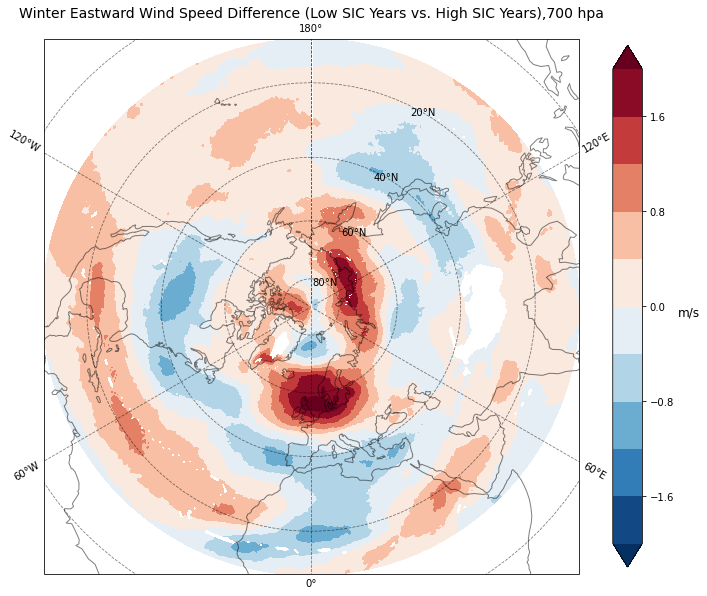

In [108]:
file1 = 'LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'HighSICYears-WindSpeed-10deg_detrended-data_700hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][:,:]  ## high sic years
wind = wind1-wind2   ##low - high
#climwind=ds3['U'][0,:]

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (Low SIC Years vs. High SIC Years),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & El Nino Years

In [6]:

filename_list=[]
for i in (1988,1995,1998,2005,2007,2010,2015,2016,2019):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('ElNino_LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-6-73f4abe6a642>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

## High SIC & El Nino Years

In [7]:
#1983,1987,1992,2003
filename_list=[]
for i in (1983,1987,1992,2003):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('ElNino_HighSICYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].values)
<ipython-input-7-b4a38175907d>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][0:,0,i,j].

## (Low SIC & El Nino) - (High SIC & El Nino) Wind Plot

In [ ]:
file1 = 'ElNino_LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'ElNino_HighSICYears-WindSpeed-10deg_detrended-data_700hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][:,:]  ## high sic & el nino years
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (Low SIC & El Nino Years vs. High SIC & El Nino Years),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC - Climatology 

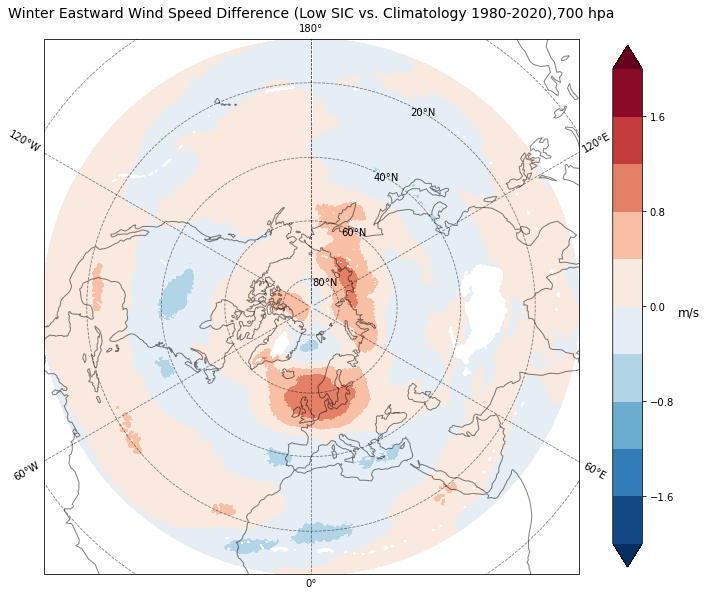

In [106]:
file1 = 'LowSICYears-WindSpeed-10deg_detrended-data.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (Low SIC vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

In [71]:
file='30yearWindSpeed-10deg.nc'
ds = xr.open_dataset(file)
print(ds)

<xarray.Dataset>
Dimensions:  (level: 2, x: 576, y: 161)
Dimensions without coordinates: level, x, y
Data variables:
    lat      (y) float64 ...
    lon      (x) float64 ...
    lev      (level) float64 ...
    U        (level, y, x) float64 ...


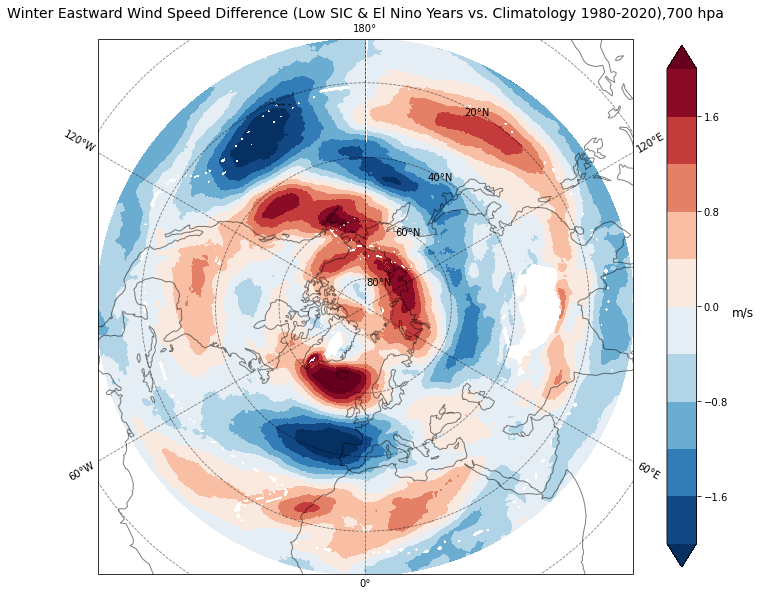

In [105]:
file1 = 'ElNino_LowSICYears-WindSpeed-10deg_detrended-data.nc'
ds1 = xr.open_mfdataset(file1)    
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][0,:]  ## high sic & el nino years
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (Low SIC & El Nino Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## El Nino Years

In [2]:
#1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019

filename_list=[]
for i in (1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('ElNinoYears-WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-2-f796a47bea09>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time

## El Nino - Climatology

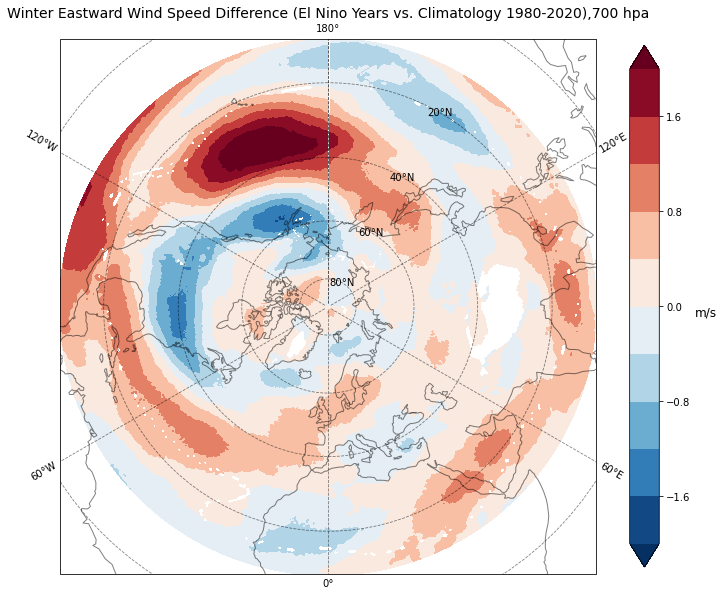

In [3]:
file1 = 'ElNinoYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)    
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][0,:]  ## high sic & el nino years
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-2, 2, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (El Nino Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Temperature Plots 

## 40 Year Avg

In [109]:
#1980-2020
filename_list=[]
for i in range(1980,2021):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('Climatological_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

## El Nino Years

In [8]:
#1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019
filename_list=[]
for i in (1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('ElNinoYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

## Low SIC Years

In [9]:
#1981,1984,1988,1989,1990,1993,1995,1997,1998,2002,2005,2006,2007,2010,2011,2012,2015,2016,2019,2020
filename_list=[]
for i in (1981,1984,1988,1989,1990,1993,1995,1997,1998,2002,2005,2006,2007,2010,2011,2012,2015,2016,2019,2020):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('LowSICYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

## High SIC Years

In [10]:
#1982,1983,1985,1986,1987,1991,1992,1994,1996,1999,2000,2001,2003,2004,2008,2009,2013,2014,2017,2018
filename_list=[]
for i in (1982,1983,1985,1986,1987,1991,1992,1994,1996,1999,2000,2001,2003,2004,2008,2009,2013,2014,2017,2018):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('HighSICYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

## Low SIC - High SIC Temp Plot

Text(0.5, 1.0, 'Average Winter Temperature Difference (Low SIC vs. High SIC)')

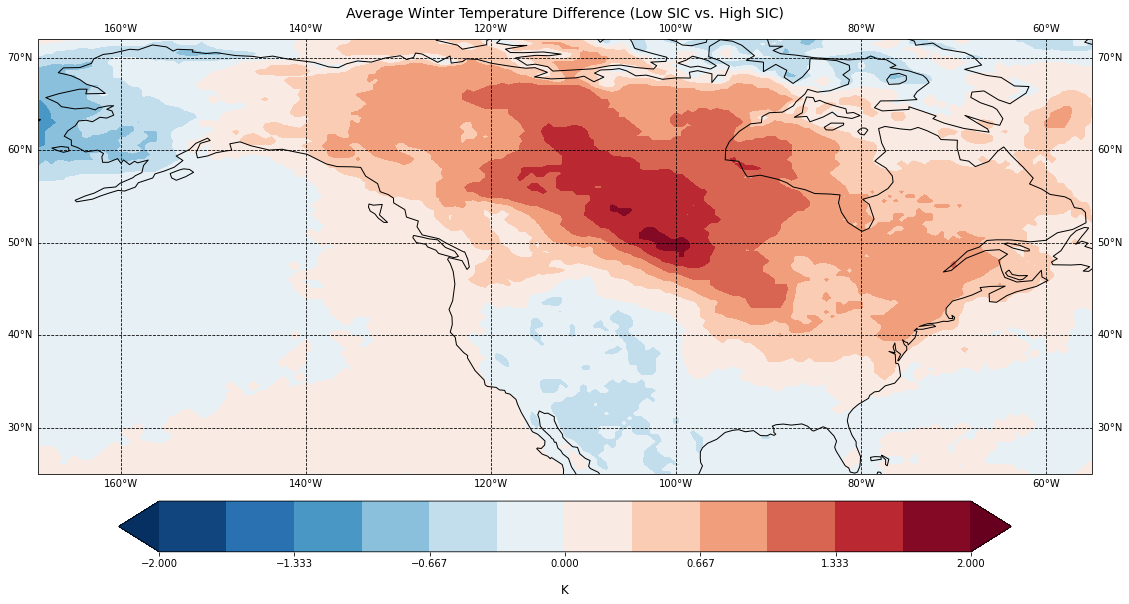

In [53]:
f = nc.Dataset('LowSICYears_Temp_detrended-data.nc', 'r')  #low sic years
f2=nc.Dataset('HighSICYears_Temp_detrended-data.nc','r')  #high sic years
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low high
t2=f2.variables['T2M'][:,:]   ##high sic
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Temperature Difference (Low SIC vs. High SIC)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Low SIC & El Nino Years

In [11]:
#1988,1995,1998,2005,2007,2010,2015,2016,2019
filename_list=[]
for i in (1988,1995,1998,2005,2007,2010,2015,2016,2019):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

## High SIC & El Nino Years

In [12]:
#1983,1987,1992,2003
filename_list=[]
for i in (1983,1987,1992,2003):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('ELNino_HighSICYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

## Low SIC & El Nino - High SIC & El Nino Temp Plot

Text(0.5, 1.0, 'Average Winter Temperature Difference (Low SIC & El Nino vs. High SIC & El Nino)')

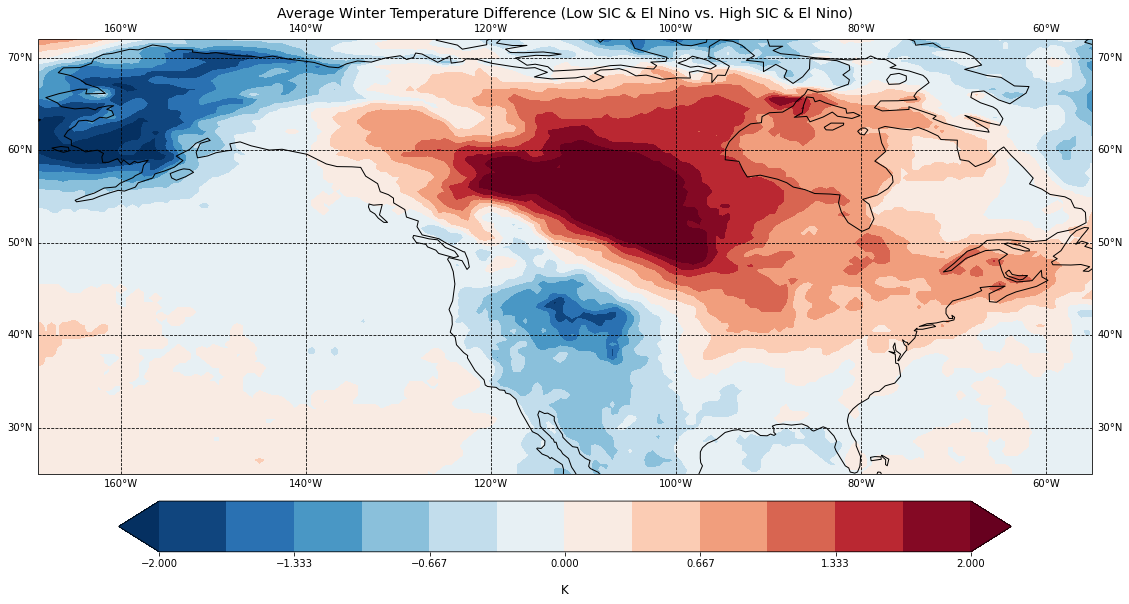

In [51]:
f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
f2=nc.Dataset('ElNino_HighSICYears_Temp_detrended-data.nc','r')  #high sic & el nino years
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low sic & el nino
t2=f2.variables['T2M'][:,:]   ##high sic & el nino
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Temperature Difference (Low SIC & El Nino vs. High SIC & El Nino)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Low SIC - Climatology 

Text(0.5, 1.0, 'Average Winter Temperature Difference (Low SIC  vs. Climatological Avg 1980-2020)')

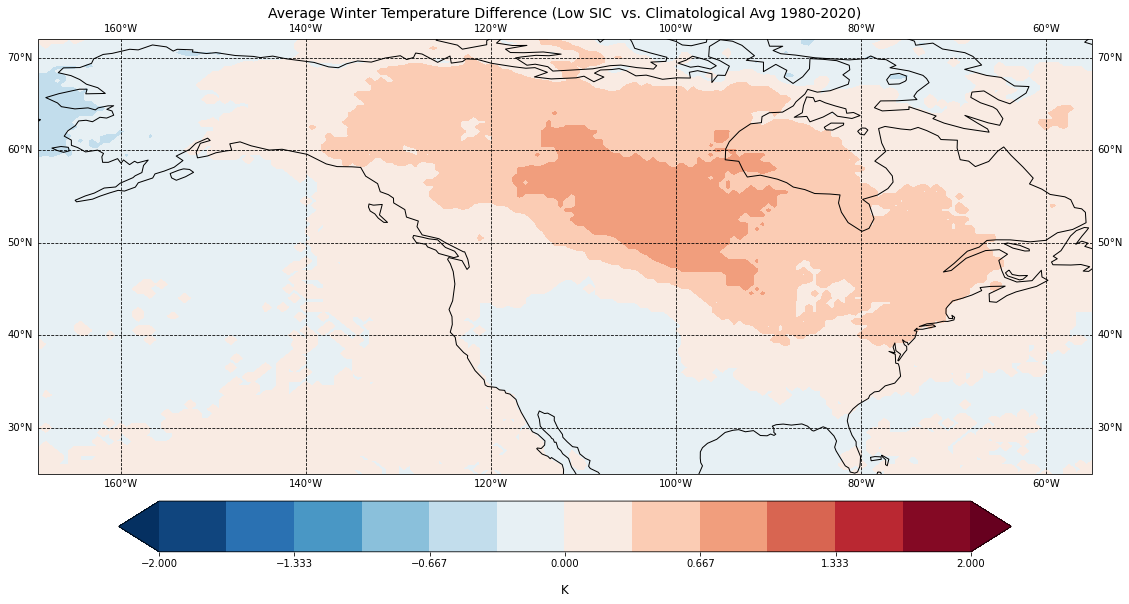

In [115]:
f = nc.Dataset('LowSICYears_Temp_detrended-data.nc', 'r')  #low sic
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #cliamtology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low sic 
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Temperature Difference (Low SIC  vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Low SIC & El Nino - Climatology

Text(0.5, 1.0, 'Average Winter Temperature Difference (Low SIC & El Nino vs.Climatological Avg 1980-2020)')

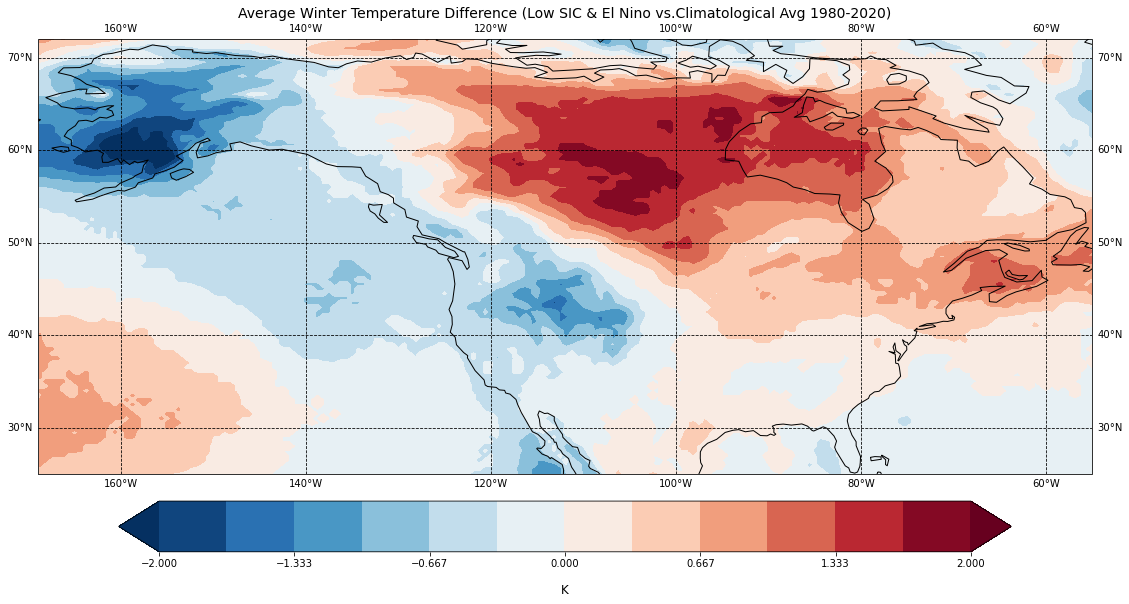

In [116]:
f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##low sic & el nino
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Temperature Difference (Low SIC & El Nino vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

# Precipitation

In [102]:
file1 = 'Data/Precipitation/X156.68.221.10.144.12.25.27.nc'
ds1 = xr.open_mfdataset(file1)     
print(ds1['precip'][0,:,:].values)

[[2.28 2.07 1.46 ... 0.25 0.35 0.84]
 [1.73 2.26 2.74 ... 0.29 0.61 1.61]
 [2.6  2.39 2.38 ... 0.62 1.04 2.38]
 ...
 [6.86 4.91 3.21 ... 4.52 5.16 5.4 ]
 [5.16 4.78 2.94 ... 5.15 6.66 5.69]
 [4.58 5.04 5.28 ... 5.28 5.78 5.04]]


In [47]:
print(np.datetime_as_string(ds1['time'][4].values)[0:4])
#print(ds1['time'][:].values)

1980


In [ ]:
file1 = 'Data/Precipitation/X156.68.221.10.144.12.25.27.nc'
ds1 = xr.open_mfdataset(file1)

In [39]:
file1 = 'Data/Precipitation/X156.68.221.10.144.12.25.27.nc'
ds1 = xr.open_dataset(file1)
for elem in range(0,len(ds1['time'][:])-1,4):          ## len(ds1['time'][:])
    if np.datetime_as_string(ds1['time'][elem].values)[5:7]=='11':
        #print(ds1['time'][elem:elem+4].values)
        filename='Data/Precipitation/Yearly-Precipitation/Precipitation-{}.nc'.format(np.datetime_as_string(ds1['time'][elem+3].values)[0:4])
        print(filename)
        f = nc.Dataset('Data/Precipitation/Yearly-Precipitation/Precipitation-{}.nc'.format(np.datetime_as_string(ds1['time'][elem+3].values)[0:4]),'w')
        f.createDimension('time', 1)
        f.createDimension('y', len(ds1['lat']))
        f.createDimension('x', len(ds1['lon']))
        lats = f.createVariable('lat', float, ('y', ), zlib=True)
        lons = f.createVariable('lon', float, ('x', ), zlib=True)
        precip = f.createVariable('precip', float, ('time','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
        year=f.createVariable('time',float,('time',),zlib=True)
        # create latitude and longitude 1D arrays
        lat_out  = ds1.variables['lat']
        lon_out  = ds1.variables['lon']
        
        data = []
        for i in range (0, len(lat_out)):
            for j in range(0,len(lon_out)):
                mean = np.nanmean(ds1['precip'][elem:elem+4,i,j].values)
                data.append(mean)
        data_out = np.array(data)      ##1d array of data
        data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 3d array                 
        #f['precip'][:] = data_out
        #f['lat'][:] = lat_out
        #f['lon'][:] = lon_out
        #f['time'][:] = np.datetime_as_string(ds1['time'][elem+3].values)[0:4]
        lats[:] = lat_out
        lons[:] = lon_out
        precip[:] = data_out
        year[:]=np.datetime_as_string(ds1['time'][elem+3].values)[0:4]

        f.close()

Data/Precipitation/Yearly-Precipitation/Precipitation-1980.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1981.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1982.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1983.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1984.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1985.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1986.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1987.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1988.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1989.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1990.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1991.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1992.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1993.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1994.nc
Data/Precipitation/Yearly-Precipitation/Precipitation-1995.nc
Data/Pre

In [3]:
f.close()

In [99]:
file='Data/Precipitation/Yearly-Precipitation/Precipitation-1980.nc'
ds = xr.open_dataset(file)
print(ds['precip'])
#print(ds['lon'][:])
#print(ds['lat'][:])
ds.close()

<xarray.DataArray 'precip' (time: 1, y: 24, x: 47)>
array([[[1.1875, 1.125 , ..., 0.4375, 0.875 ],
        [0.875 , 1.25  , ..., 0.6875, 1.5625],
        ...,
        [2.    , 1.875 , ..., 2.8125, 2.75  ],
        [2.125 , 2.3125, ..., 3.3125, 2.5625]]])
Coordinates:
  * time     (time) float64 1.98e+03
Dimensions without coordinates: y, x


Text(0.5, 1.0, 'Average monthly precipitation rate, winter 1980 ')

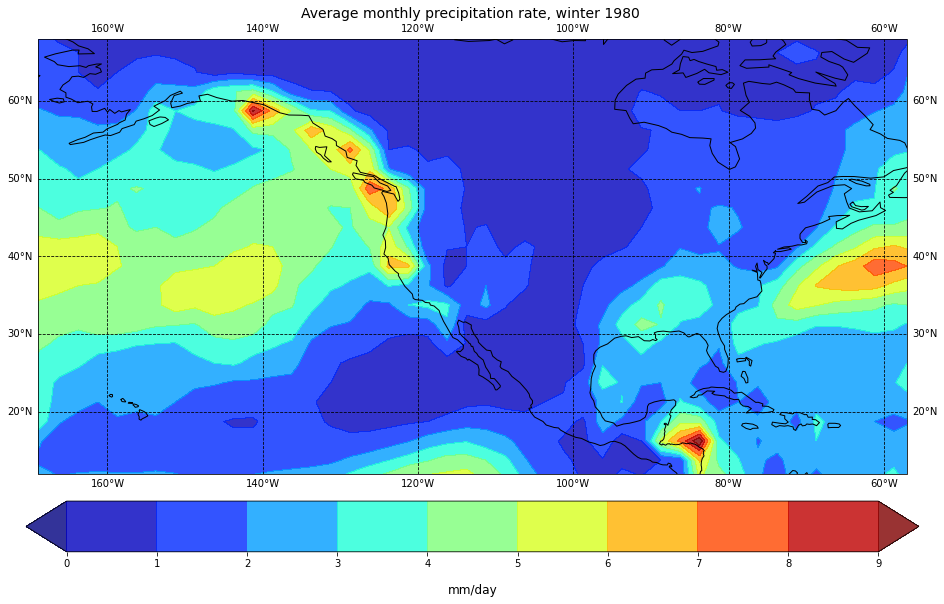

In [47]:
lat = ds.variables['lat']
lon = ds.variables['lon']

rain=ds.variables['precip'][0,:,:]

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-57,12,68],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(0,9,10)
plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),levels=levels,cmap='jet',extend='both',alpha=0.8)
#plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),cmap='jet',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mm/day',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average monthly precipitation rate, winter 1980 ', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## El Nino 

In [49]:
file='Data/Precipitation/Yearly-Precipitation/Precipitation-1983.nc'
ds = nc.Dataset(file)
print(ds)
print(ds['lon'][:])
print(ds['lat'][:])
ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(1), y(24), x(47)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 precip(time, y, x), float64 time(time)
    groups: 
[188.75 191.25 193.75 196.25 198.75 201.25 203.75 206.25 208.75 211.25
 213.75 216.25 218.75 221.25 223.75 226.25 228.75 231.25 233.75 236.25
 238.75 241.25 243.75 246.25 248.75 251.25 253.75 256.25 258.75 261.25
 263.75 266.25 268.75 271.25 273.75 276.25 278.75 281.25 283.75 286.25
 288.75 291.25 293.75 296.25 298.75 301.25 303.75]
[68.75 66.25 63.75 61.25 58.75 56.25 53.75 51.25 48.75 46.25 43.75 41.25
 38.75 36.25 33.75 31.25 28.75 26.25 23.75 21.25 18.75 16.25 13.75 11.25]


In [50]:
##Years:1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019
filename_list=[]
for i in (1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019):
    file = 'Data/Precipitation/Yearly-Precipitation/Precipitation-{}.nc'.format(i)
    filename_list.append(file)        
print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
print(combined_ds)



['Data/Precipitation/Yearly-Precipitation/Precipitation-1983.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-1987.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-1988.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-1992.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-1995.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-1998.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-2003.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-2005.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-2007.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-2010.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-2015.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-2016.nc', 'Data/Precipitation/Yearly-Precipitation/Precipitation-2019.nc']
<xarray.Dataset>
Dimensions:  (time: 13, x: 47, y: 24)
Coordinates:
  * time     (time) float64 1.983e+03 1.987e+03 ... 2.016e+03 2.019e+03
Dimensions wit

In [78]:
##Years:1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019
filename_list=[]
for i in (1983,1987,1988,1992,1995,1998,2003,2005,2007,2010,2015,2016,2019):
    file = 'Data/Precipitation/Yearly-Precipitation/Precipitation-{}.nc'.format(i)
    filename_list.append(file)        
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')

f = nc.Dataset('ElNinoYears_Precipitation_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat'][0,:]))
f.createDimension('x', len(combined_ds['lon'][0,:]))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
precip = f.createVariable('precip', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
print(lats,lons)
lat_out  = np.array(combined_ds['lat'][0,:].values)
lon_out  = np.array(combined_ds['lon'][0,:].values)
print(lat_out)
print(lon_out)
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        #time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['precip'][0:,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
print(len(data_out))
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array
print(data_out.shape)
lats[:] = lat_out
lons[:] = lon_out
precip[:,:] = data_out
# close file to write on disk
f.close()

<class 'netCDF4._netCDF4.Variable'>
float64 lat(y)
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used <class 'netCDF4._netCDF4.Variable'>
float64 lon(x)
unlimited dimensions: 
current shape = (47,)
filling on, default _FillValue of 9.969209968386869e+36 used
[68.75 66.25 63.75 61.25 58.75 56.25 53.75 51.25 48.75 46.25 43.75 41.25
 38.75 36.25 33.75 31.25 28.75 26.25 23.75 21.25 18.75 16.25 13.75 11.25]
[188.75 191.25 193.75 196.25 198.75 201.25 203.75 206.25 208.75 211.25
 213.75 216.25 218.75 221.25 223.75 226.25 228.75 231.25 233.75 236.25
 238.75 241.25 243.75 246.25 248.75 251.25 253.75 256.25 258.75 261.25
 263.75 266.25 268.75 271.25 273.75 276.25 278.75 281.25 283.75 286.25
 288.75 291.25 293.75 296.25 298.75 301.25 303.75]
1128
(24, 47)


In [76]:
f.close()

In [77]:
combined_ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(0), y(24), x(47)
    variables(dimensions): float64 lat(y), float64 lon(x), float64 precip(y, x)
    groups: 


Text(0.5, 1.0, 'Average monthly precipitation rate, winter 1980 ')

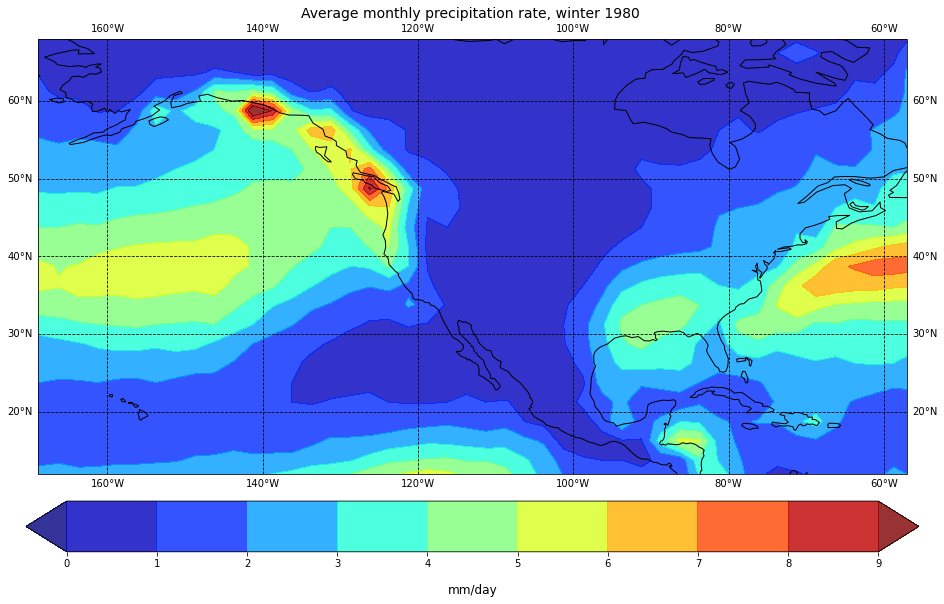

In [81]:
f = nc.Dataset('ElNinoYears_Precipitation_detrended-data.nc', 'r')
print(f)

lat = f.variables['lat']
lon = f.variables['lon']

rain=f.variables['precip'][:,:]

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-57,12,68],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(0,9,10)
plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),levels=levels,cmap='jet',extend='both',alpha=0.8)
#plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),cmap='jet',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mm/day',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average monthly precipitation rate, winter 1980 ', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Low SIC

In [84]:
#1981,1984,1988,1989,1990,1993,1995,1997,1998,2002,2005,2006,2007,2010,2011,2012,2015,2016,2019,2020
filename_list=[]
for i in (1981,1984,1988,1989,1990,1993,1995,1997,1998,2002,2005,2006,2007,2010,2011,2012,2015,2016,2019,2020):
    file = 'Data/Precipitation/Yearly-Precipitation/Precipitation-{}.nc'.format(i)
    filename_list.append(file)        
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('LowSICYears_Precipitation_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat'][0,:]))
f.createDimension('x', len(combined_ds['lon'][0,:]))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
precip = f.createVariable('precip', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
print(lats,lons)
lat_out  = np.array(combined_ds['lat'][0,:].values)
lon_out  = np.array(combined_ds['lon'][0,:].values)
print(lat_out)
print(lon_out)
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        #time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['precip'][0:,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
print(len(data_out))
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array
print(data_out.shape)
lats[:] = lat_out
lons[:] = lon_out
precip[:,:] = data_out
# close file to write on disk
f.close()

<class 'netCDF4._netCDF4.Variable'>
float64 lat(y)
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of 9.969209968386869e+36 used <class 'netCDF4._netCDF4.Variable'>
float64 lon(x)
unlimited dimensions: 
current shape = (47,)
filling on, default _FillValue of 9.969209968386869e+36 used
[68.75 66.25 63.75 61.25 58.75 56.25 53.75 51.25 48.75 46.25 43.75 41.25
 38.75 36.25 33.75 31.25 28.75 26.25 23.75 21.25 18.75 16.25 13.75 11.25]
[188.75 191.25 193.75 196.25 198.75 201.25 203.75 206.25 208.75 211.25
 213.75 216.25 218.75 221.25 223.75 226.25 228.75 231.25 233.75 236.25
 238.75 241.25 243.75 246.25 248.75 251.25 253.75 256.25 258.75 261.25
 263.75 266.25 268.75 271.25 273.75 276.25 278.75 281.25 283.75 286.25
 288.75 291.25 293.75 296.25 298.75 301.25 303.75]
1128
(24, 47)


## El Nino & Low SIC

In [89]:
#1988,1995,1998,2005,2007,2010,2015,2016,2019
filename_list=[]
for i in (1988,1995,1998,2005,2007,2010,2015,2016,2019):
    file = 'Data/Precipitation/Yearly-Precipitation/Precipitation-{}.nc'.format(i)
    filename_list.append(file)        
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('ElNinoLowSICYears_Precipitation_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat'][0,:]))
f.createDimension('x', len(combined_ds['lon'][0,:]))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
precip = f.createVariable('precip', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
#print(lats,lons)
lat_out  = np.array(combined_ds['lat'][0,:].values)
lon_out  = np.array(combined_ds['lon'][0,:].values)
#print(lat_out)
#print(lon_out)
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        #time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['precip'][0:,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
#print(len(data_out))
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array
#print(data_out.shape)
lats[:] = lat_out
lons[:] = lon_out
precip[:,:] = data_out
# close file to write on disk
f.close()

In [98]:
f = nc.Dataset('ElNinoLowSICYears_Precipitation_detrended-data.nc', 'r')

[[0.9375 0.8125 0.5625 ... 0.3125 0.4375 1.    ]
 [0.8125 0.875  0.75   ... 0.4375 0.8125 1.8125]
 [1.125  1.     0.875  ... 0.75   1.1875 2.5625]
 ...
 [1.1875 1.1875 1.0625 ... 1.6875 1.625  1.5   ]
 [1.375  1.375  1.625  ... 1.6875 1.8125 1.4375]
 [2.5625 2.625  2.5    ... 1.875  2.3125 1.9375]]


## Climatology

In [92]:
filename_list=[]
for i in range(1980,2021):
    file = 'Data/Precipitation/Yearly-Precipitation/Precipitation-{}.nc'.format(i)
    filename_list.append(file)        
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('Climatology_Precipitation_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat'][0,:]))
f.createDimension('x', len(combined_ds['lon'][0,:]))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
precip = f.createVariable('precip', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
#print(lats,lons)
lat_out  = np.array(combined_ds['lat'][0,:].values)
lon_out  = np.array(combined_ds['lon'][0,:].values)
#print(lat_out)
#print(lon_out)
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        #time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['precip'][0:,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
#print(len(data_out))
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array
#print(data_out.shape)
lats[:] = lat_out
lons[:] = lon_out
precip[:,:] = data_out
# close file to write on disk
f.close()

## Low SIC & El Nino - Climatology

Text(0.5, 1.0, 'Average Winter Precipitation Difference (Low SIC & El Nino vs. Climatological Avg 1980-2020)')

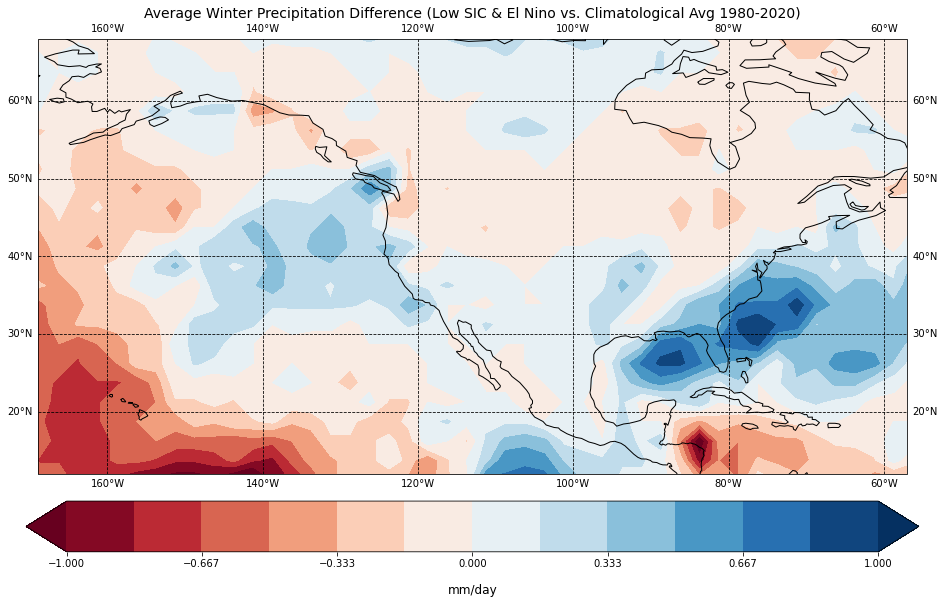

In [195]:
f = nc.Dataset('ElNinoLowSICYears_Precipitation_detrended-data.nc', 'r')  #low sic & el nino years
f2=nc.Dataset('Climatology_Precipitation_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
p1=f.variables['precip'][:,:]     ##low sic & el nino
p2=f2.variables['precip'][:,:]   ##climatology
rain=p1-p2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-57,12,68],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-1,1,13)
plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu',extend='both')
#plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mm/day',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Precipitation Difference (Low SIC & El Nino vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Low SIC - Climatology

Text(0.5, 1.0, 'Average Winter Precipitation Difference (Low SIC vs. Climatological Avg 1980-2020)')

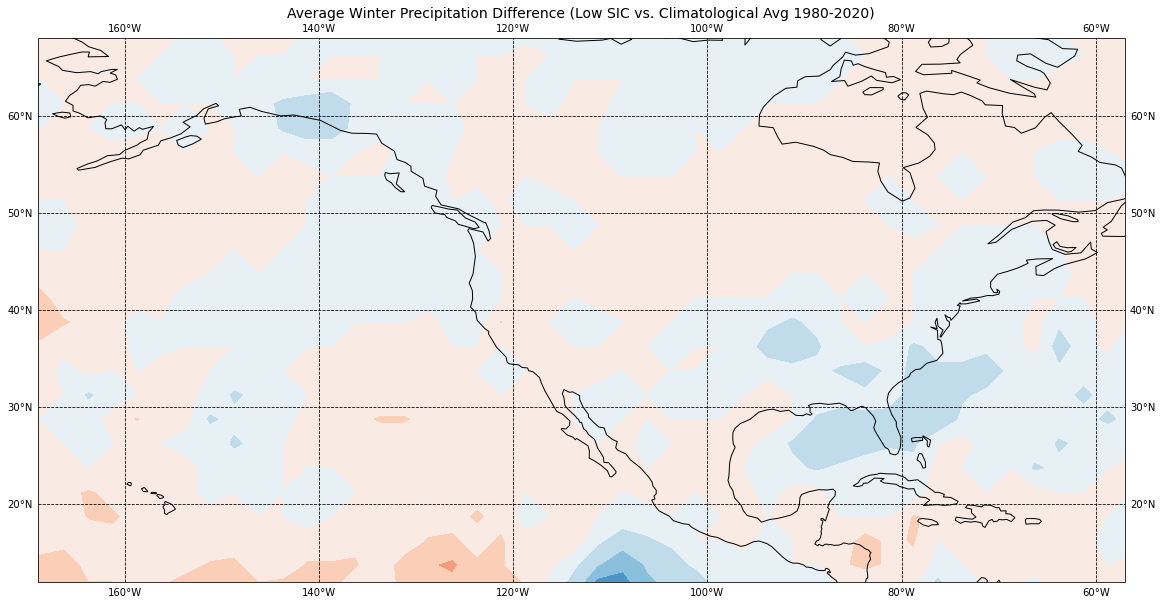

In [194]:
f = nc.Dataset('LowSICYears_Precipitation_detrended-data.nc', 'r')  #low sic & el nino years
f2=nc.Dataset('Climatology_Precipitation_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
p1=f.variables['precip'][:,:]     ##low sic & el nino
p2=f2.variables['precip'][:,:]   ##climatology
rain=p1-p2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-57,12,68],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-1,1,13)
plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu',extend='both')
#plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
#cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('mm/day',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Precipitation Difference (Low SIC vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## El Nino - Climatology

Text(0.5, 1.0, 'Average Winter Precipitation Difference (El Nino vs. Climatological Avg 1980-2020)')

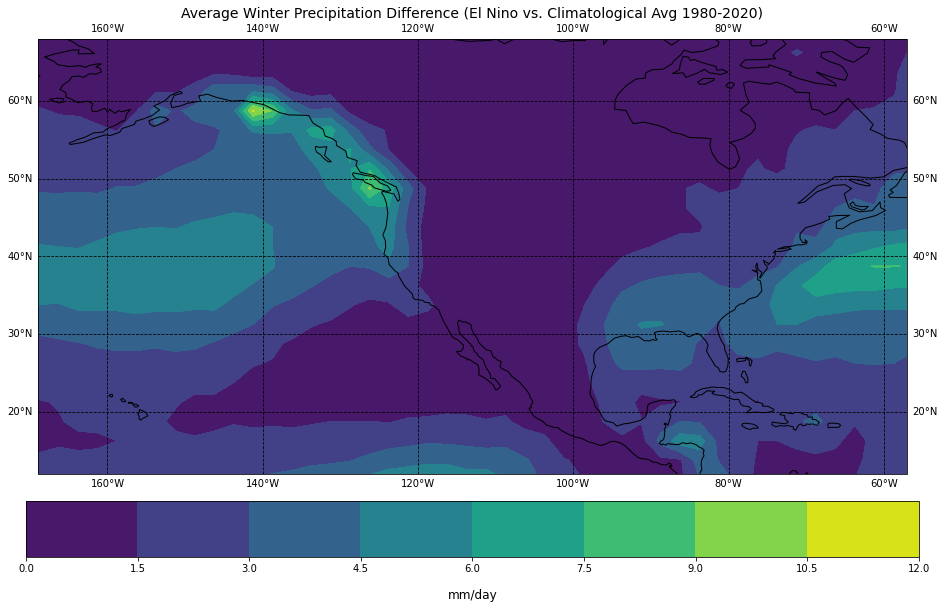

In [190]:
f = nc.Dataset('ElNinoYears_Precipitation_detrended-data.nc', 'r')  #low sic & el nino years
rain=f.variables['precip'][:,:]     ##low sic & el nino

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-57,12,68],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-1,1,13)
plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree())
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('mm/day',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Precipitation Difference (El Nino vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

Text(0.5, 1.0, 'Average Winter Precipitation Difference (El Nino vs. Climatological Avg 1980-2020)')

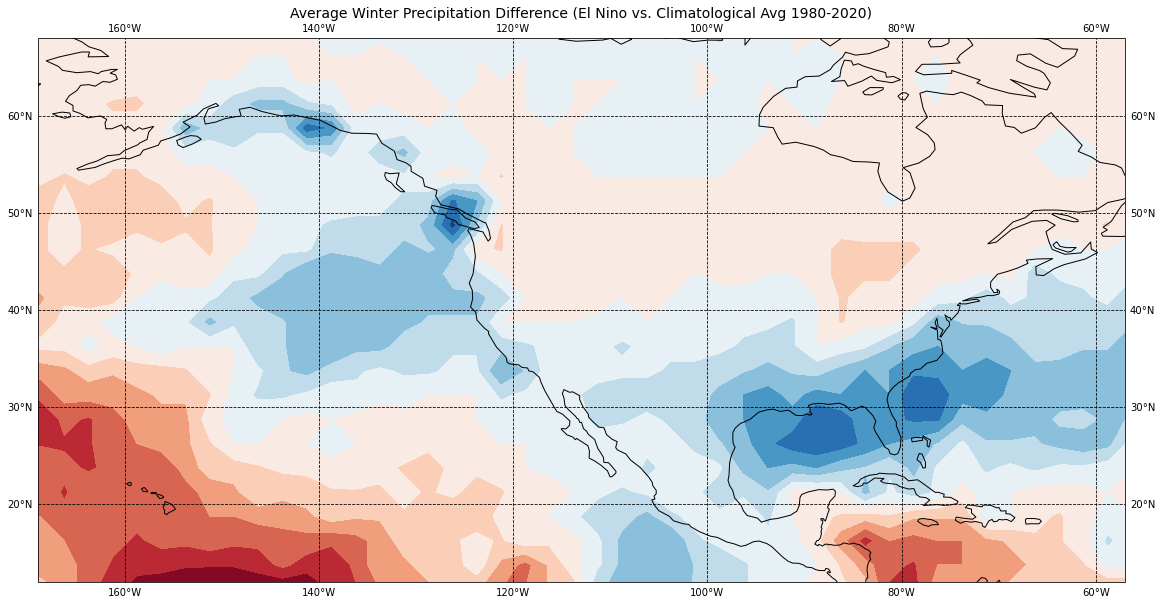

In [192]:
f = nc.Dataset('ElNinoYears_Precipitation_detrended-data.nc', 'r')  #low sic & el nino years
f2=nc.Dataset('Climatology_Precipitation_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
p1=f.variables['precip'][:,:]     ##low sic & el nino
p2=f2.variables['precip'][:,:]   ##climatology
rain=p1-p2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-57,12,68],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-1,1,13)
plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu',extend='both')
#plt.contourf(lons, lats, rain,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
#cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
#cb.set_label('mm/day',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
plt.title('Average Winter Precipitation Difference (El Nino vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

# Central & Eastern Pacific El Nino 

## Temperature

In [123]:
##Low sic & Eastern Pacific Nino: 1998, 2007
filename_list=[]
for i in (1998,2007):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('EPNino_LowSICYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

In [126]:
## central pacific & low sic: 1988,1995,2005,2010
filename_list=[]
for i in (1988,1995,2005,2010):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('CPNino_LowSICYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

In [132]:
## All eastern pacific El Nino: 1983,1987,1998,2007
filename_list=[]
for i in (1983,1987,1998,2007):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('EPNinoYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

In [131]:
f.close()

In [133]:
##All central pacific El Nino: 1988,1992,1995,2003,2005,2010
filename_list=[]
for i in (1988,1992,1995,2003,2005,2010):
    if i < 1992:
        if i == 1980:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_100.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        else:    
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_200.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_300.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}11.nc4.nc4'.format(i-1)
            file2='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}12.nc4.nc4'.format(i-1)
            file3='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}01.nc4.nc4'.format(i)
            file4='Data/Temperature-Data/MERRA2_400.tavgM_2d_slv_Nx.{}02.nc4.nc4'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('CPNinoYears_Temp_detrended-data.nc', 'w')
f.createDimension('time', None)
f.createDimension('y',len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
temp = f.createVariable('T2M', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']
data = []
for i in range (0,len(lat_out)):
    for j in range(0,len(lon_out)):
        time = len(combined_ds.variables['time'])
        mean = np.nanmean(combined_ds['T2M'][0:time,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
temp[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

### Eastern Pacific Nino - Climatology

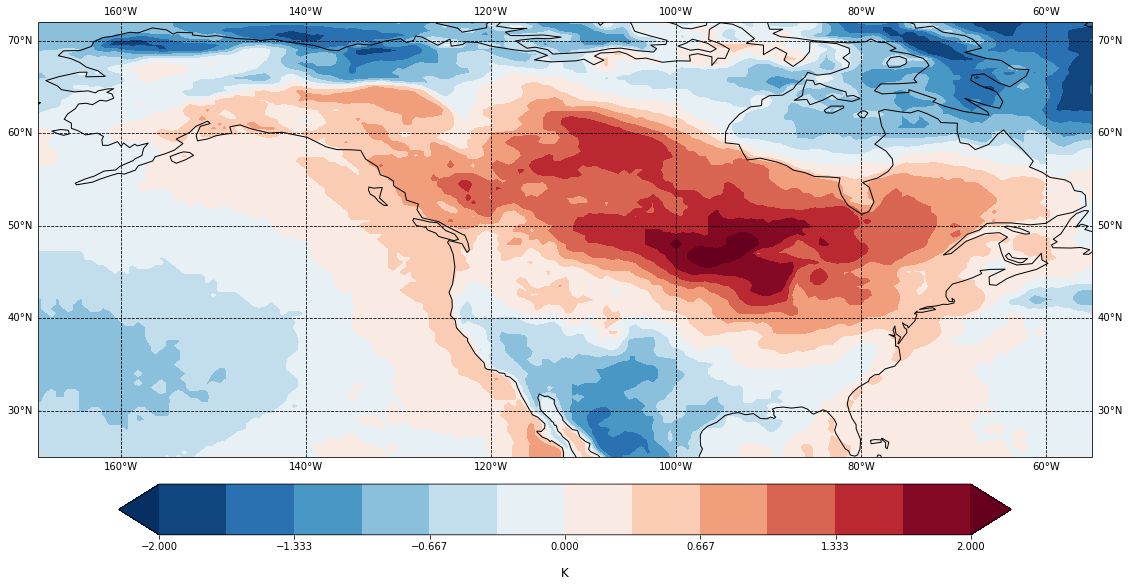

In [174]:
f = nc.Dataset('EPNinoYears_Temp_detrended-data.nc', 'r')  #eastern pacific years
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##EP El Nino
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Eastern Pacific vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Central Pacific Nino - Climatology

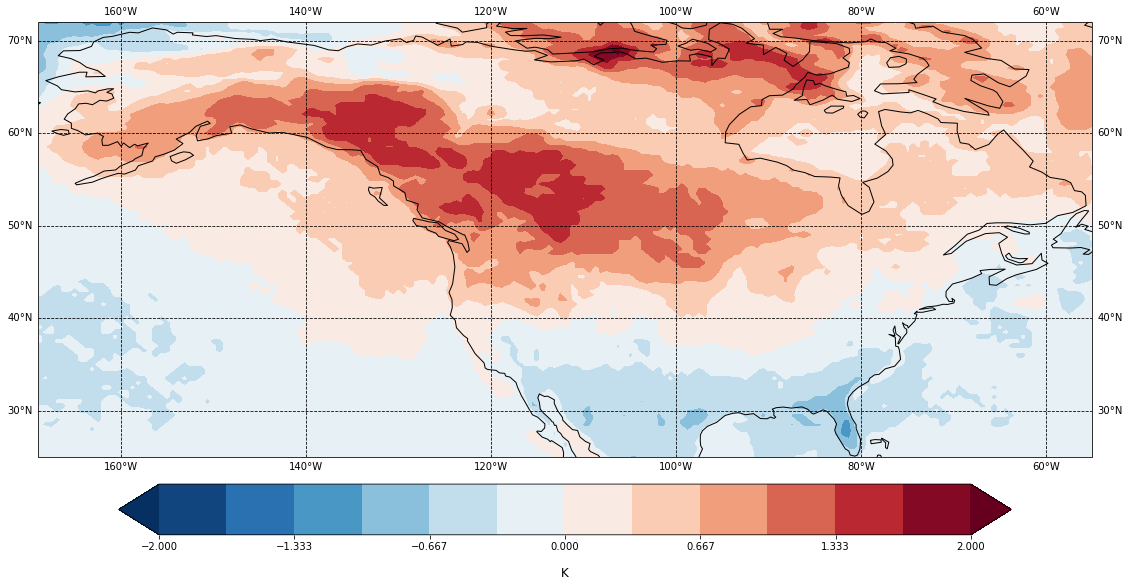

In [175]:
f = nc.Dataset('CPNinoYears_Temp_detrended-data.nc', 'r')  #central pacific years
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##CP El Nino
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Central Pacific vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low sic & EP - Climatology

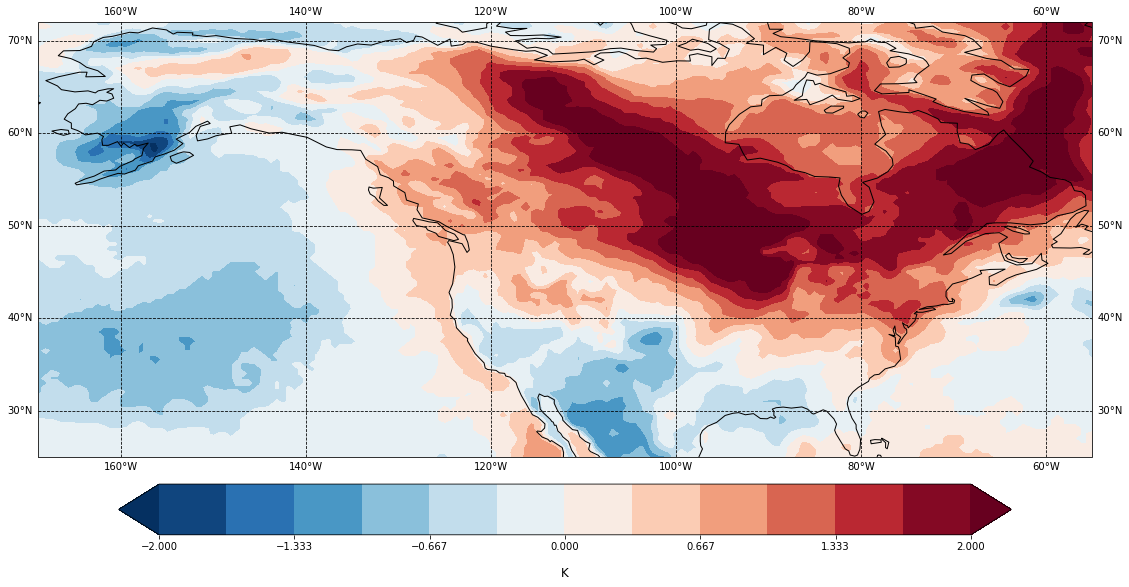

In [176]:
f = nc.Dataset('EPNino_LowSICYears_Temp_detrended-data.nc', 'r')  #eastern pacific & el nino
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##EP El Nino & low sic
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Eastern Pacific & Low SIC vs. Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low sic & CP - Climatology

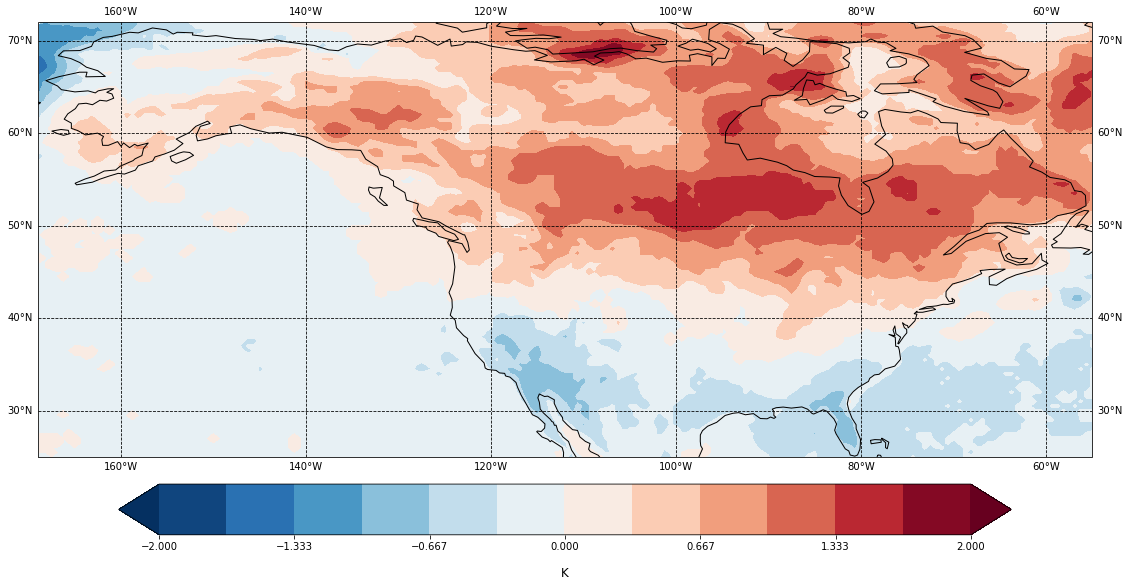

In [177]:
f = nc.Dataset('CPNino_LowSICYears_Temp_detrended-data.nc', 'r')  #central pacific & el nino
f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology
lat= f.variables['lat']
lon=f.variables['lon']
t1=f.variables['T2M'][:,:]     ##CP El Nino & low sic
t2=f2.variables['T2M'][:,:]   ##climatology
temp=t1-t2


fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-2,2,13)
plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, temp,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label('K',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Central Pacific & Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

## Wind

In [154]:
##Low sic & Eastern Pacific Nino: 1998, 2007

filename_list=[]
for i in (1998, 2007):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('EPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-154-56364994464a>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

In [155]:
## Central Pacific Nino & Low sic:1988,1995,2005,2010
filename_list=[]
for i in (1988,1995,2005,2010):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('CPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-155-932eff72a5f6>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

In [156]:
##Eastern Pacific Nino only:1983,1987,1998,2007
filename_list=[]
for i in (1983,1987,1998,2007):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)

f = nc.Dataset('EPNino_WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-156-c513e7aaf10c>:92: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

In [157]:
## Central Pacific Nino Only: 1988,1992,1995,2003,2005,2010
filename_list=[]
for i in (1988,1992,1995,2003,2005,2010):
    if i < 1992:
        if i == 1980:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
    elif i <2001:
        if i == 1992:
            file1='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        else:    
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
        filename_list.append(file1)
        filename_list.append(file2)
        filename_list.append(file3)
        filename_list.append(file4) 
    else:
        if i ==2001:
            file1='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_200.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        elif i<2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)
        elif i == 2011:
            file1='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_300.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4) 
        else:
            file1='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}11.SUB.nc'.format(i-1)
            file2='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}12.SUB.nc'.format(i-1)
            file3='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}01.SUB.nc'.format(i)
            file4='Data/Wind-Data/10Deg/MERRA2_400.instM_3d_asm_Np.{}02.SUB.nc'.format(i)
            filename_list.append(file1)
            filename_list.append(file2)
            filename_list.append(file3)
            filename_list.append(file4)    
#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')
#print(combined_ds)


f = nc.Dataset('CPNino_WindSpeed-10deg_detrended-data_700hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
#f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
#levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)

# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
lon_out  = combined_ds.variables['lon']

data = []
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 2d array                 
f['U'][:] = data_out
f['lat'][:] = lat_out
f['lon'][:] = lon_out
# close file to write on disk
f.close()

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j].values) #time,level,lat,lon
<ipython-input-157-54089000b859>:93: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(combined_ds['U'][:,0,i,j]

### Eastern Pacific Nino - Climatology

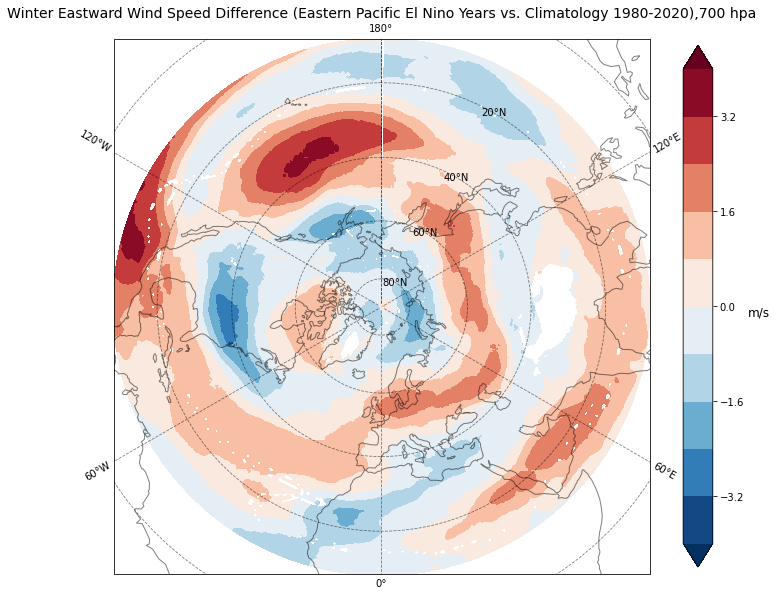

In [164]:
file1 = 'EPNino_WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)    
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## eastern pacific el nino
wind2=ds2['U'][0,:]  ## climatology
wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (Eastern Pacific El Nino Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Central Pacific Nino - Climatology

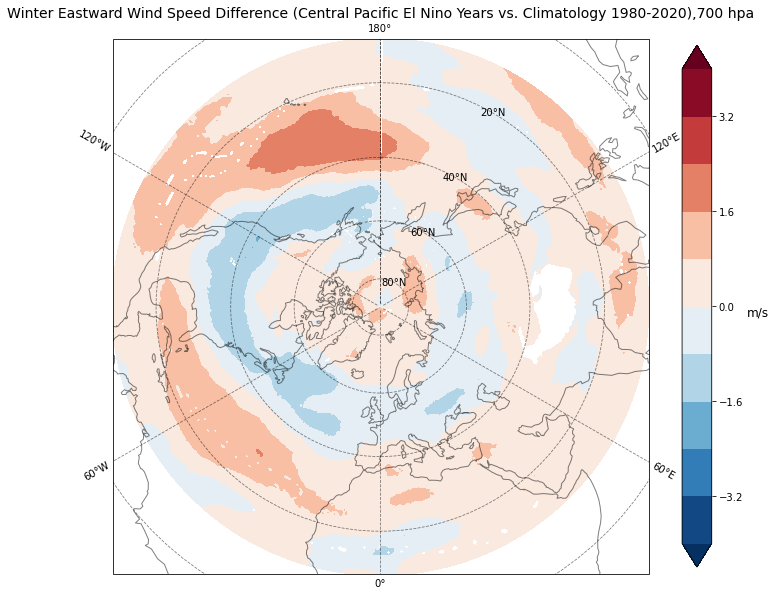

In [165]:
file1 = 'CPNino_WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)    
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## eastern pacific el nino
wind2=ds2['U'][0,:]  ## climatology
wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (Central Pacific El Nino Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### EP & Low SIC - Clim

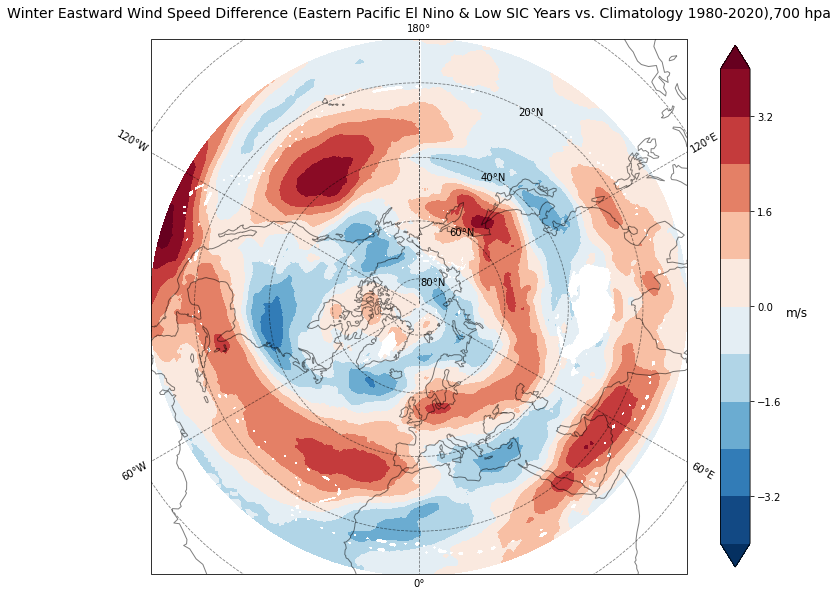

In [187]:
file1 = 'EPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)    
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## eastern pacific el nino
wind2=ds2['U'][0,:]  ## climatology
wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('Winter Eastward Wind Speed Difference (Eastern Pacific El Nino & Low SIC Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### CP Nino & Low SIC - Clim

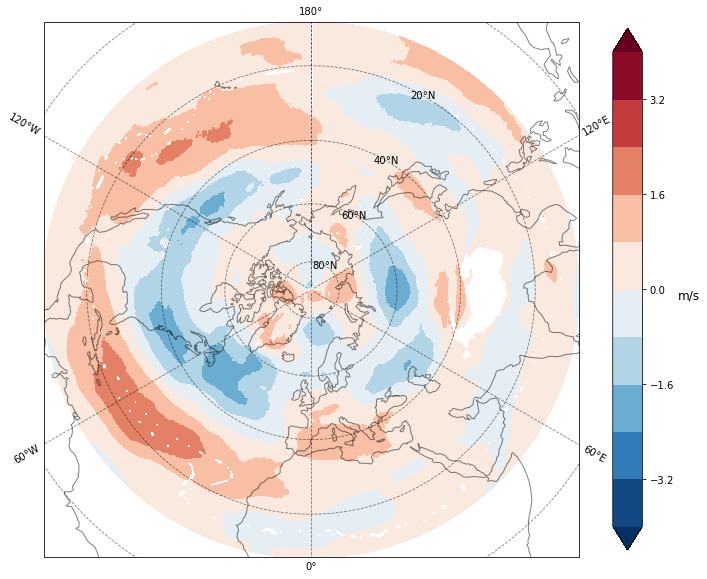

In [186]:
file1 = 'CPNino-LowSIC_WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)    
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## central pacific el nino
wind2=ds2['U'][0,:]  ## climatology
wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
#plt.title('Winter Eastward Wind Speed Difference (Central Pacific El Nino & Low SIC Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC - Climatology

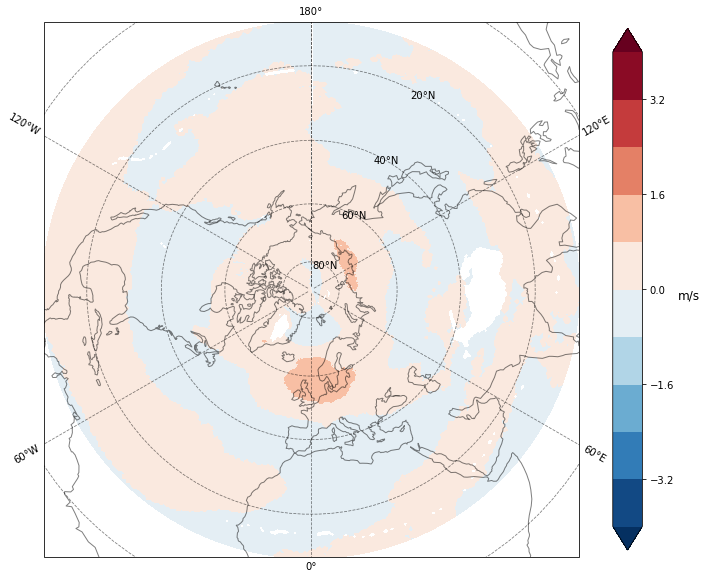

In [179]:
file1 = 'LowSICYears-WindSpeed-10deg_detrended-data_700hPa.nc'
ds1 = xr.open_mfdataset(file1)    
file2 = '30yearWindSpeed-10deg.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## eastern pacific el nino
wind2=ds2['U'][0,:]  ## climatology
wind = wind1-wind2   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
#plt.title('Winter Eastward Wind Speed Difference (Low SIC Years vs. Climatology 1980-2020),700 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Precipitation - Entire NH

## Temperature - Entire NH